# **Systematic Review Output from The University of Alabama Using Python and Scopus API**

By: Lance Simpson, Research and Instructional Services Librarian, 
Rodgers Library for Science and Engineering, The University of Alabama

This software was created for use in [LOEX 2022](http://www.loexconference.org/) presentation,
*Building a Systematic Review Instruction & Research Support Program: An Instructional Framework*,
by Karleigh Riesen, Alex Boucher, and Lance Simpson. 

We conducted all searches in various [Scopus APIs](https://dev.elsevier.com/tecdoc_ir_cris_vivo.html) using [Pybliometrics Wrappers](https://pybliometrics.readthedocs.io/en/stable/#).
Search strategies were derived from [UA Libraries's Scholarly API Cookbook: Scopus API in Python](https://ualibweb.github.io/UALIB_ScholarlyAPI_Cookbook/content/scripts/python/python_scopus.html).

For this project, we used [Jupyter Lab](https://jupyter.org/) to both conduct the searches, and create the slides.
A rendering of our searches is with an [MIT License]() can be found at [Lance's Github page for this project](https://github.com/lsimpsonlibrary/systematic_review_research_loex_2022).

## **Starting the Search**

We started with a search string in the ScopusSearch API for all indexed reviews published
by faculty members at The University of Alabama in Tuscaloosa, AL.  We looked at one data set with no time period specified,
one set that looks at the last ten years, and one set that looks at the last five years.

Our code and search strings are as follows:

### **Install and Import Necessary Libraries**

#### **Install Pybliometrics** [1]

In [1]:
# Installing pybliometrics
import sys
!{sys.executable} -m pip install pybliometrics

#### **Import Pybliometrics** [2]

In [2]:
# Import pybliometrics library

import pybliometrics

#### **Import Necessary Libraries** [2]

In [2]:
# importing necessary libraries

# We will use ScopusSearch to run the query and to pull data pieces
# such as funding sources, and author count

from pybliometrics.scopus import ScopusSearch

# We will use Abstract Retrieval to pull subject codes for articles, as well as publication years

from pybliometrics.scopus import AbstractRetrieval

# For this notebook, we are using time as a way to create delays in requests
# This prevents us from overwhelming servers as we have large datasets to request

import time

# NumPy and Pandas allow us to data some analysis of the data we gather.

import numpy as np

import pandas as pd

# MatPlotLib allows us to visualize some of the data outputs.

import matplotlib.pyplot as plt

___________________________________________________________________________________
* [1] Vanderplas, J. (2017). [Installing Python Packages from a Jupyter Notebook](https://jakevdp.github.io/blog/2017/12/05/installing-python-packages-from-jupyter/), Jake Vanderplas
* [2] Scalfani, V.F. (2022). [Scopus API in Python, The University of Alabama Libraries Scholarly API Cookbook](https://ualibweb.github.io/UALIB_ScholarlyAPI_Cookbook/)

## **The Search Strings** [2][3]

In [3]:
# No date range

a1 = (ScopusSearch(('TITLE-ABS-KEY("systematic review" OR "systematic literature review"\
OR "meta-analysis") AND AFFIL(uni* AND Al*) AND AFFILCITY(tuscaloosa)'), download=True, reason=""))

# Date Range: 2011-2022

a2 = (ScopusSearch('TITLE-ABS-KEY("systematic review" OR "systematic literature review"\
OR "meta-analysis") AND AFFIL(uni* AND Al*) AND AFFILCITY(tuscaloosa)\
AND PUBYEAR  >  2011  AND  PUBYEAR  <  2023 ', download=True, reason=""))

# Date Range: 2017-2022

a3 = ScopusSearch('TITLE-ABS-KEY("systematic review" OR "systematic literature review"\
OR "meta-analysis") AND AFFIL(uni* AND Al*) AND AFFILCITY(tuscaloosa)\
AND PUBYEAR  >  2017  AND  PUBYEAR  <  2023 ', download=True, reason="")


### **Total Number of Systematic Reviews or Meta-analyses by Search** [4]

In [8]:
# Uses the print, string, and get_results_size functions to print out the total numbers for each search

print("Total number of systematic reviews and\
meta-analyses with UA authors = ")

print((str(a1.get_results_size())))

print("Number of systematic reviews and meta-analyses\
with UA authors in the last ten years = ")

print((str(a2.get_results_size())))

print("Number of systematic reviews and meta-analyses\
with UA authors in the last five years = ")

print(str(a3.get_results_size()))


Total number of systematic reviews andmeta-analyses with UA authors = 
261
Number of systematic reviews and meta-analyseswith UA authors in the last ten years = 
220
Number of systematic reviews and meta-analyseswith UA authors in the last five years = 
148


___________________________________________________________________________________
* [2] Scalfani, V.F. (2022). [Scopus API in Python, The University of Alabama Libraries Scholarly API Cookbook](https://ualibweb.github.io/UALIB_ScholarlyAPI_Cookbook/)
* [3] Elesevier. (2022). [Scopus Search API](https://dev.elsevier.com/documentation/ScopusSearchAPI.wadl)
* [4] Pybliometrics Documentation. [ScopusSearch](https://pybliometrics.readthedocs.io/en/stable/classes/ScopusSearch.html#pybliometrics.scopus.ScopusSearch)

## **Creating DataFrames with Search String Output in Pandas for Data Analysis**

In [6]:
# Creates a DataFrame from all results

sr_df = pd.DataFrame(a1.results)

# Creates a DataFrame from all results from the past 10 years

sr_df_10 = pd.DataFrame(a2.results)

# Creates a Data Frame from all results from the past 5 years. 

sr_df_5 = pd.DataFrame(a3.results)

### *For the remainder of the examples below, we will use the data from the search* 
### *including results from the past 10 years*

## **Analysis**

### Let's take a look at some quick numbers from our dataset

#### **Publication by Year** [4][5][6][7]

In [7]:
# Creats a data frame from the publication dates, using a string and split method to\ 
# split the 10 character date string

publication_dates = pd.DataFrame(list(sr_df_10.iloc[:,16].str.split('-')))

# Pulls the total counts for each year, organizes them by value, and renames columns\ 
# to reflect 'Year' and 'Count'

pub_counts = publication_dates.iloc[:,0].value_counts().sort_index().reset_index().\
rename(columns={'index': 'Year', 0:'Count'})

# Creates a list of the years for publication, and sorts them in ascending order

year_list = list(pub_counts.iloc[:,0].sort_values())

# Renders a sorted count for publications by year

pub_counts.sort_values(by='Count', ascending=False)

,Year,Count
7,2019,45
9,2021,40
8,2020,28
6,2018,24
5,2017,20
4,2016,15
3,2015,14
10,2022,12
2,2014,11
1,2013,7


#### **Visualizing the Data** [8]
2018 to 2019 saw a large jump, with a decrease in 2020, and an increase in 2021.
The chart below has left off data from 2022 as it is currently incomplete.

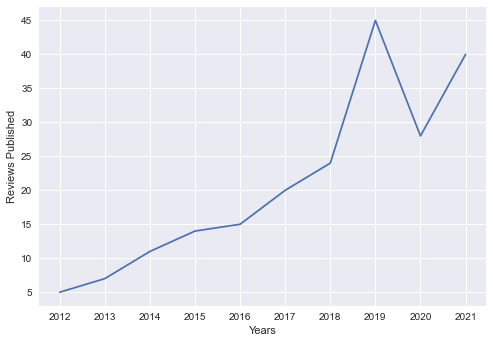

In [8]:
# Creates graph in 'seaborn' style with Reviews Published as the y-axis,\ 
# and Years Published as the x-axis

years = pub_counts.iloc[0:10 , 0]
count = pub_counts.iloc[0:10 , 1]
plt.style.use('seaborn')
plt.plot(years,count)
plt.xlabel('Years')
plt.ylabel('Reviews Published')
plt.show()

___________________________________________________________________________________
* [4] Pybliometrics Documentation. [ScopusSearch](https://pybliometrics.readthedocs.io/en/stable/classes/ScopusSearch.html#pybliometrics.scopus.ScopusSearch)
* [5] Pandas Documentation. [DataFrame.sort_values](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.sort_values.html)
* [6] Pandas Documentation. [Series.sort.index](https://pandas.pydata.org/docs/reference/api/pandas.Series.sort_index.html)
* [7] Pandas Documentation. [DataFrame.rename](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.rename.html)
* [8] Software Carpentry. [Plotting and Programming with Python: Plotting](http://swcarpentry.github.io/python-novice-gapminder/09-plotting/index.html)

## Subjects and Publication Years
We wanted to take a look at the subjects represented in SR publishing on campus, and so we built a `For Loop` to look at both the subjects and the years for their publication. For this search, we pulled a list of the associated EIDs for all articles in our dataset from the last 10 years. This search used both the EID list we had created, and ran it against a Scopus API called Abstract Retrieval. Please see the code below:

### We started by creating a list of the EIDs to be run a few searches for specific data [4]

In [10]:
# Pulls all EIDs into a list, and drops any n/a values
# This is a built in function of Pybliometrics/ScopusSearch wrapper

eid_list = a2.get_eids()

### **Created a DataFrame with the Subject Headings and Publication Years** [2][9][10]

In [11]:
# Getting Subject Categories from Abstract Retrieval as well as the\ 
# corresponding year for publication
# This program uses a loop to request this information using 
# the EID list we created earlier

# Creates a blank list to add our data from the loop
articles_subjects_years = []

# Creates a loop to run through our list of EIDs
for eid in eid_list:
    
    # Uses Abstract Retrieval to pull the subject category information by EID
    qs_ab = AbstractRetrieval(eid, id='eid', view='FULL')
    
    # Creates a variable for all represented subject areas for articles from our list
    # These are rendered as tuples in Python
    sub_cat = qs_ab.subject_areas
    
    # Creates a variable for all publication dates for articles from our list
    # These are rendered as strings in Python, using this format: 'YYYY-MM-DD'
    pub_date = qs_ab.coverDate
    
    # Creates an loop within our broader loop
    # This first loop takes each subject category and converts the tuple to a list\
    # for each subject
    for cat in sub_cat:
        cat_list = list(cat)
     
        # Creates a loop within our internal loop
        # This second loop takes each publication date and converts it to an integer
        # It also pulls only the first four positions from the date, which here.\
        # is the year
        for date in pub_date:
            pub_list = int(pub_date[0:4])
    
    # Adds each of our publication dates to the corresponding subject category\
    # in the cat_list
    cat_list.append(pub_list)
    
    # Adds this full list of subject categories and years to our\ 
    # articles_subjects_years list
    articles_subjects_years.append(cat_list)    
    
    # Place a 1 second sleep between each action
    time.sleep(1)

# Creates a DataFrame from our list, and names columns to correspond with data
sub_yrs_df = pd.DataFrame\
(articles_subjects_years, columns =\
 {'Area': articles_subjects_years[0],\
  'Abbreviation': articles_subjects_years[1],\
  'Code': articles_subjects_years[2],  'Pub_Date': articles_subjects_years[3]})

### **Publication Counts by Area**

In [13]:
# Pulls publication counts from the new sub_yrs_df DataFrame
sub_yrs_df.iloc[:,0].value_counts().head(20).reset_index()\
.rename(columns={'index': 'Area', 'Area':'Count'})

,Area,Count
0,Psychiatry and Mental Health,19
1,"Physical Therapy, Sports Therapy and Rehabilit...",12
2,"Public Health, Environmental and Occupational ...",10
3,Behavioral Neuroscience,9
4,Nursing (all),6
5,Industrial and Manufacturing Engineering,6
6,Marketing,6
7,Gastroenterology,6
8,Clinical Psychology,5
9,Nutrition and Dietetics,5


In [14]:
# Creates a variable that can be used to visulize data
areas_percentage = sub_yrs_df.iloc[:,0].value_counts().head(20).reset_index()\
.rename(columns={'index': 'Area', 0:'Count'})

### **Visualization of Top 20 Subjects Since 2011** [11]


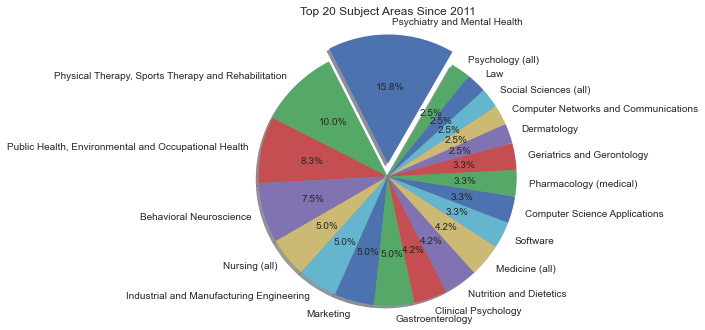

In [15]:
# Creates a pie chart with categories divded out by percentage of respresenation
labels = areas_percentage.iloc[:,0]
sizes = areas_percentage.iloc[:,1]
explode = (0.1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0)
fig1, ax1 = plt.subplots()
ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=60)
ax1.axis('equal')
plt.title('Top 20 Subject Areas Since 2011')
plt.show()

#### **Publication Counts by Abbreviation (Broader Categories)** [8]

In [16]:
# Creates a variable that can be used to visulize data

broad_areas_percentage = sub_yrs_df.iloc[:,1].value_counts().head(10)\
.reset_index().rename(columns={'index': 'Broad Area', 0:'Count'})

### **Visualization of Top 10 Publication Counts by Abbreviation (Broader Categories)** [11]

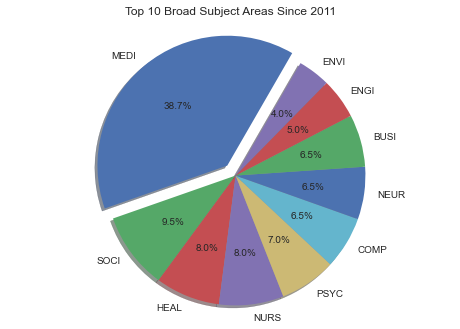

In [17]:
# Creates a pie chart with categories divded out by percentage of respresenation
labels = broad_areas_percentage.iloc[:,0]
sizes = broad_areas_percentage.iloc[:,1]
explode = (0.1, 0, 0, 0, 0, 0, 0, 0, 0, 0) 
fig1, ax1 = plt.subplots()
ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=60)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.title('Top 10 Broad Subject Areas Since 2011')
plt.show()

In [18]:
# Creates a variable that can be used to visulize data

psych_years = sub_yrs_df.loc[(sub_yrs_df.iloc[:,0] == 'Psychiatry and Mental Health')]\
.value_counts('Pub_Date').sort_index().reset_index().rename(columns={'index': 'Year', 0:'Count'})

### **Visualization of Psychiatry and Mental Health by Year of Publication** [8]

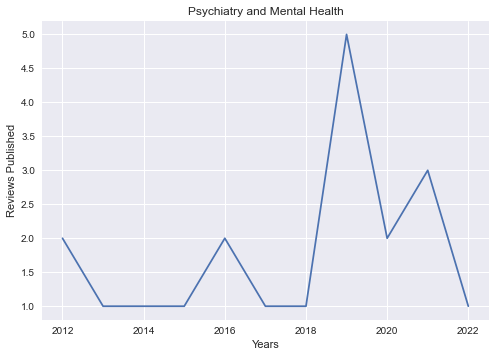

In [19]:
# Creates a graph visualization of the data
years_psych = psych_years.iloc[:,0]
count_psych = psych_years.iloc[:,1]
plt.style.use('seaborn')
plt.title('Psychiatry and Mental Health')
plt.plot(years_psych, count_psych)
plt.xlabel('Years')
plt.ylabel('Reviews Published')
plt.show()

### **Building Datasets for Visualizations by Subject and Year of Publication**

In [20]:
# Creates a set of variables that can be used to visulize data by year

year_2016 = sub_yrs_df.loc[sub_yrs_df.iloc[:,3] == 2016].value_counts('Area')\
.sort_values(ascending=False).reset_index().rename(columns={'index': 'Area', 0:'Count'})

year_2017 = sub_yrs_df.loc[sub_yrs_df.iloc[:,3] == 2017].value_counts('Area')\
.sort_values(ascending=False).reset_index().rename(columns={'index': 'Area', 0:'Count'})

year_2018 = sub_yrs_df.loc[sub_yrs_df.iloc[:,3] == 2018].value_counts('Area')\
.sort_values(ascending=False).reset_index().rename(columns={'index': 'Area', 0:'Count'})

year_2019 = sub_yrs_df.loc[sub_yrs_df.iloc[:,3] == 2019].value_counts('Area')\
.sort_values(ascending=False).reset_index().rename(columns={'index': 'Area', 0:'Count'})

year_2020 = sub_yrs_df.loc[sub_yrs_df.iloc[:,3] == 2020].value_counts('Area')\
.sort_values(ascending=False).reset_index().rename(columns={'index': 'Area', 0:'Count'})

year_2021 = sub_yrs_df.loc[sub_yrs_df.iloc[:,3] == 2021].value_counts('Area')\
.sort_values(ascending=False).reset_index().rename(columns={'index': 'Area', 0:'Count'})

year_2022 = sub_yrs_df.loc[sub_yrs_df.iloc[:,3] == 2022].value_counts('Area')\
.sort_values(ascending=False).reset_index().rename(columns={'index': 'Area', 0:'Count'})

### **Visualization of Top 5 Publication Categories for 2017** [8]

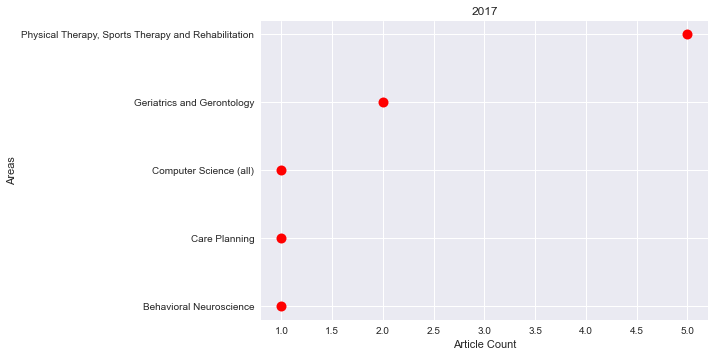

In [21]:
# Creates a graph visualization of the data

area_2017 = year_2017.iloc[0:5, 0].sort_values()
count_2017 = year_2017.iloc[0:5, 1].sort_values()
plt.style.use('seaborn')
plt.plot(count_2017, area_2017, 'ro', markersize=10)
plt.xlabel('Article Count')
plt.ylabel('Areas')
plt.title(2017)
plt.show()

### **Visualization of Top 5 Publication Categories for 2018** [8]

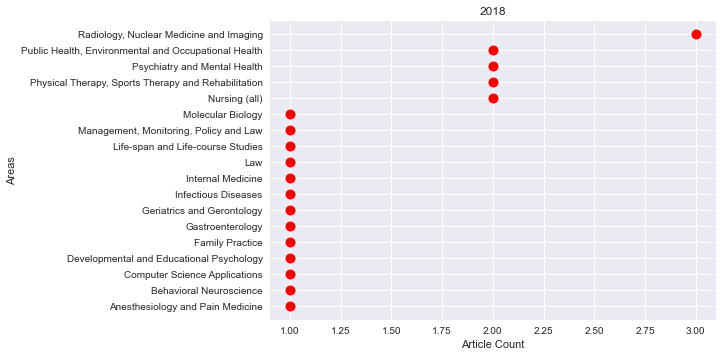

In [22]:
# Creates a graph visualization of the data

area_2018 = year_2018.iloc[:, 0].sort_values()
count_2018 = year_2018.iloc[:, 1].sort_values()
plt.style.use('seaborn')
plt.plot(count_2018, area_2018, 'ro', markersize=10)
plt.xlabel('Article Count')
plt.ylabel('Areas')
plt.title(2018)
plt.show()

### **Visualization of Top 5 Publication Categories for 2019** [8]

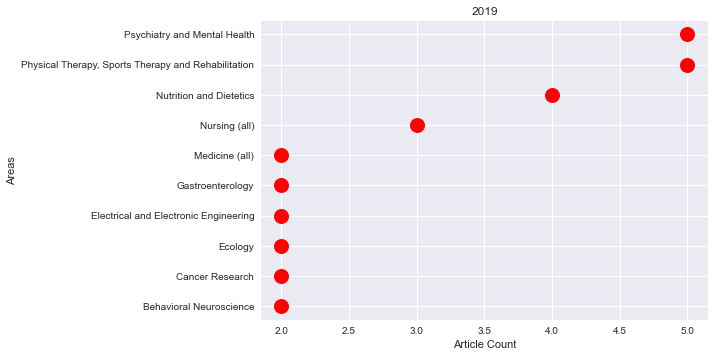

In [23]:
# Creates a graph visualization of the data

area_2019 = year_2019.iloc[0:10, 0].sort_values()
count_2019 = year_2019.iloc[0:10, 1].sort_values()
plt.style.use('seaborn')
plt.plot(count_2019, area_2019, 'ro', markersize =15)
plt.xlabel('Article Count')
plt.ylabel('Areas')
plt.title(2019)
plt.show()

### **Visualization of Top 5 Publication Categories for 2020** [8]

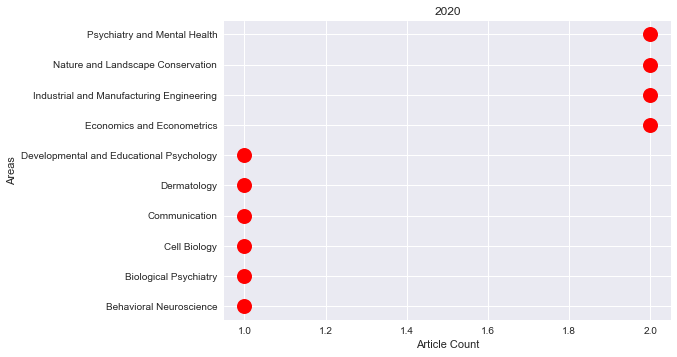

In [24]:
# Creates a graph visualization of the data

area_2020 = year_2020.iloc[0:10, 0].sort_values()
count_2020 = year_2020.iloc[0:10, 1].sort_values()
plt.style.use('seaborn')
fig, ax = plt.subplots()
plt.plot(count_2020, area_2020, 'ro', markersize=15)
plt.xlabel('Article Count')
plt.ylabel('Areas')
plt.title(2020)
plt.show()

### **Visualization of Top 5 Publication Categories for 2021** [8]

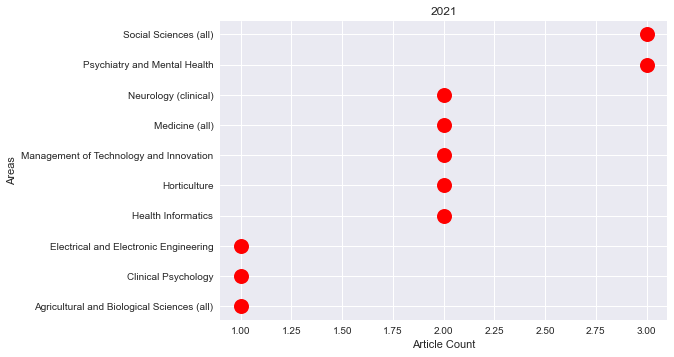

In [25]:
# Creates a graph visualization of the data

area_2021 = year_2021.iloc[0:10, 0].sort_values()
count_2021 = year_2021.iloc[0:10, 1].sort_values()
plt.style.use('seaborn')
plt.plot(count_2021, area_2021, 'ro', markersize=15)
plt.xlabel('Article Count')
plt.ylabel('Areas')
plt.title(2021)
plt.show()

### **Visualization of Top 5 Publication Categories for 2022** [8]

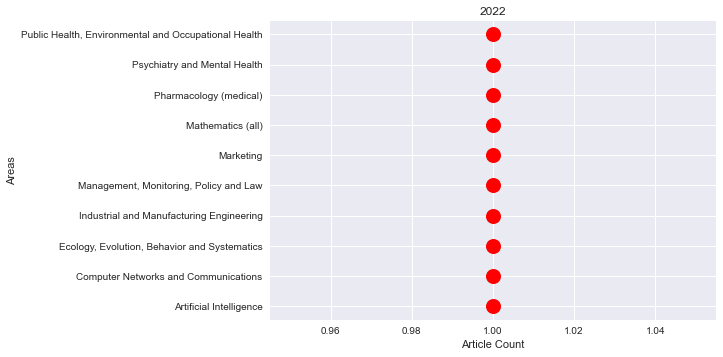

In [26]:
# Creates a graph visualization of the data

area_2022 = year_2022.iloc[0:10, 0].sort_values()
count_2022 = year_2022.iloc[0:10, 1].sort_values()
plt.style.use('seaborn')
plt.plot(count_2022, area_2022, 'ro', markersize=15)
plt.xlabel('Article Count')
plt.ylabel('Areas')
plt.title(2022)
plt.show()

___________________________________________________________________________________
* [2] Scalfani, V.F. (2022). [Scopus API in Python, The University of Alabama Libraries Scholarly API Cookbook](https://ualibweb.github.io/UALIB_ScholarlyAPI_Cookbook/)
* [4] Pybliometrics Documentation. [ScopusSearch](https://pybliometrics.readthedocs.io/en/stable/classes/ScopusSearch.html#pybliometrics.scopus.ScopusSearch)
* [8] Software Carpentry. [Plotting and Programming with Python: Plotting](http://swcarpentry.github.io/python-novice-gapminder/09-plotting/index.html)
* [9] W3 Schools. [Python Glossary: Python Nested Loops](https://www.w3schools.com/python/gloss_python_for_nested.asp)
* [10] Pybliometrics Documentation. [AbstractRetrieval](https://pybliometrics.readthedocs.io/en/stable/classes/AbstractRetrieval.html)
* [11] MatPlotLib. [Basic Pie Chart](https://matplotlib.org/3.1.3/gallery/pie_and_polar_charts/pie_features.html)

## **Other Interesting Data Points**

### **Funding** [4]

In [27]:
# Pulls funding information from the original sr_df_10 Dataframe
funding_df = pd.DataFrame(sr_df_10.iloc[:,35]).value_counts().sort_values(ascending=False)\
.reset_index().rename(columns={'fund_sponsor': 'Funding Sponsor', 0:'Count'})
funding_df

,Funding Sponsor,Count
0,National Science Foundation,15
1,National Institutes of Health,11
2,University of Alabama,4
3,National Institute on Aging,2
4,U.S. Department of Veterans Affairs,2
5,U.S. Department of Education,2
6,National Aeronautics and Space Administration,2
7,National Institute of Mental Health,2
8,National Natural Science Foundation of China,2
9,Foundation for the National Institutes of Health,1


### **Author Counts** [4]

In [28]:
# Pulls author count information from the original sr_df_10 Dataframe
author_count1 = pd.DataFrame(sr_df_10.iloc[:,12]).value_counts().sort_values(ascending=False)\
.reset_index().rename(columns={'author_count': 'Author Count', 0:'Occurence of Author Count'})
author_count1

,Author Count,Occurence of Author Count
0,3,52
1,4,40
2,2,36
3,5,27
4,8,13
5,1,10
6,9,10
7,7,8
8,6,7
9,10,6


___________________________________________________________________________________
* [4] Pybliometrics Documentation. [ScopusSearch](https://pybliometrics.readthedocs.io/en/stable/classes/ScopusSearch.html#pybliometrics.scopus.ScopusSearch)

## **Reproducibility and Growth**

The software from this presentation is available through GitHub under MIT License for you to download and make changes to fit your own research needs.

## **Sources Cited**
___________________________________________________________________________________

The data was downloaded from Scopus API between April 15 and May 6, 2022 via http://api.elsevier.com and http://www.scopus.com.

1. Vanderplas, J. (2017). [Installing Python Packages from a Jupyter Notebook](https://jakevdp.github.io/blog/2017/12/05/installing-python-packages-from-jupyter/), Jake Vanderplas
2. Scalfani, V.F. (2022). [Scopus API in Python, The University of Alabama Libraries Scholarly API Cookbook](https://ualibweb.github.io/UALIB_ScholarlyAPI_Cookbook/). [MIT License](https://ualibweb.github.io/UALIB_ScholarlyAPI_Cookbook/content/about/license_reuse.html)
3. Elesevier. (2022). [Scopus Search API](https://dev.elsevier.com/documentation/ScopusSearchAPI.wadl)
4. Pybliometrics Documentation. [ScopusSearch](https://pybliometrics.readthedocs.io/en/stable/classes/ScopusSearch.html#pybliometrics.scopus.ScopusSearch)
5. Pandas Documentation. [DataFrame.sort_values](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.sort_values.html)
6. Pandas Documentation. [Series.sort.index](https://pandas.pydata.org/docs/reference/api/pandas.Series.sort_index.html)
7. Pandas Documentation. [DataFrame.rename](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.rename.html)
8. Software Carpentry. [Plotting and Programming with Python: Plotting](http://swcarpentry.github.io/python-novice-gapminder/09-plotting/index.html). [CC-BY-4.0](https://creativecommons.org/licenses/by/4.0/)
9. W3 Schools. [Python Glossary: Python Nested Loops](https://www.w3schools.com/python/gloss_python_for_nested.asp)
10. Pybliometrics Documentation. [AbstractRetrieval](https://pybliometrics.readthedocs.io/en/stable/classes/AbstractRetrieval.html)
11. MatPlotLib. [Basic Pie Chart](https://matplotlib.org/3.1.3/gallery/pie_and_polar_charts/pie_features.html)
12. Scalfani, V.F. (2022). [Plotting and Working with Data in Python](https://github.com/ualibweb/UALIB_Workshops/blob/master/04_Python_spring_2022/03_Python_Plotting_and_Data.ipynb). [MIT License](https://github.com/ualibweb/UALIB_Workshops/blob/master/LICENSE)